## Random Forest Algorithm

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

More details @
https://en.wikipedia.org/wiki/Random_forest

https://medium.com/@Synced/how-random-forest-algorithm-works-in-machine-learning-3c0fe15b6674

**In this exercise we will try to predict if a customer would default or Not. Credit Card is a very important product for banks and it is crucial for them to know in advance if a customer is likely to default on credit card payments. 
We will clean the data first and then would tune the hyper parameter for final prediction model.**

In [1]:
#importing the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#reading from the file
df = pd.read_csv('credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [4]:
#checking for nulls
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
defaulted    0
dtype: int64

## Splitting data into X and y. 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('defaulted', axis =1)
y = df['defaulted']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Model building and getting the predictions

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rfc = RandomForestClassifier()

In [10]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
predictions = rfc.predict(X_test)

### Comparing with actual labels to judge the accuracy

In [12]:
from sklearn import metrics

In [13]:
metrics.confusion_matrix(y_test,predictions)


array([[7305,  454],
       [1425,  716]], dtype=int64)

In [14]:
class_rep= metrics.classification_report(y_test,predictions)
print(class_rep)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7759
           1       0.61      0.33      0.43      2141

   micro avg       0.81      0.81      0.81      9900
   macro avg       0.72      0.64      0.66      9900
weighted avg       0.79      0.81      0.79      9900



In [15]:
metrics.accuracy_score(y_test,predictions)

0.8102020202020203

### Hyper Parameter tuning

In [16]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble.forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators='warn', criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators

In [19]:
#first we will tune the max_depth paramter

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits= 5, shuffle= True)

parameters = {'max_depth': range(2,30,5)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf, cv= folds, param_grid= parameters, scoring= 'accuracy')

rf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 30, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [20]:
#getting the results in a dataframe

scores = rf.cv_results_

scores = pd.DataFrame(scores)

scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080549,0.006276,0.005197,4.003049e-04,2,{'max_depth': 2},0.799005,0.798259,0.799005,0.808458,...,0.801144,0.003768,6,0.801244,0.789490,0.802674,0.803794,0.812376,0.801915,0.007326
1,0.198277,0.004221,0.005997,1.033758e-06,7,{'max_depth': 7},0.813682,0.813682,0.810945,0.815672,...,0.811244,0.004747,1,0.830784,0.821642,0.828172,0.830348,0.831716,0.828532,0.003636
2,0.308009,0.011559,0.008795,3.998280e-04,12,{'max_depth': 12},0.817910,0.816169,0.806219,0.814677,...,0.810448,0.007720,2,0.881716,0.877363,0.882400,0.878047,0.881281,0.880162,0.002049
3,0.379967,0.004993,0.009994,4.672031e-07,17,{'max_depth': 17},0.812687,0.809950,0.807960,0.806468,...,0.806617,0.005693,3,0.926866,0.923943,0.926679,0.929042,0.930348,0.927376,0.002197
4,0.421340,0.006180,0.011793,4.000188e-04,22,{'max_depth': 22},0.808458,0.804726,0.802488,0.806219,...,0.803035,0.005250,4,0.966667,0.961194,0.964677,0.963806,0.969776,0.965224,0.002876


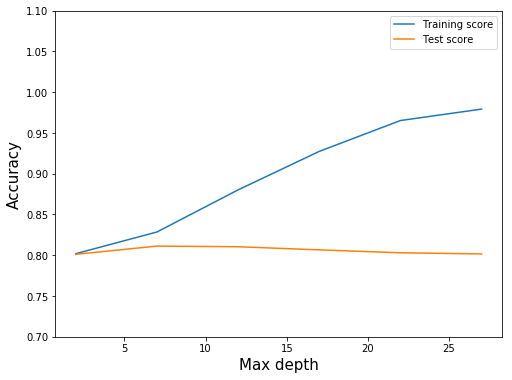

In [22]:
#plotting the train and test scores

plt.figure(figsize = (8,6))

plt.plot(scores['param_max_depth'],scores['mean_train_score'], label = 'Training score')
plt.plot(scores['param_max_depth'], scores['mean_test_score'], label = 'Test score')
plt.xlabel('Max depth', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.ylim([0.7,1.1])
plt.show()

**As we can see that model tries to over fit when we increase the max depth **

In [25]:
#now we will tune the n_estimators

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits= 5, shuffle= True)

parameters = {'n_estimators': range(50, 1500, 400)}

rf = RandomForestClassifier(max_depth= 5)

rf = GridSearchCV(rf,cv = folds, param_grid= parameters, scoring= 'accuracy')

rf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(50, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [26]:
#getting results in a data frame

scores = rf.cv_results_
scores = pd.DataFrame(scores)
scores.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.736147,0.015072,0.020787,0.000400,50,{'n_estimators': 50},0.804975,0.810448,0.813433,0.817413,...,0.810995,0.004217,4,0.811816,0.820771,0.819341,0.815920,0.815423,0.816654,0.003151
1,6.538774,0.009189,0.174492,0.002415,450,{'n_estimators': 450},0.807711,0.809950,0.811692,0.817164,...,0.811194,0.003243,2,0.814303,0.817040,0.814925,0.814801,0.818346,0.815883,0.001548
2,12.656004,0.398566,0.328998,0.011781,850,{'n_estimators': 850},0.808209,0.807960,0.812438,0.817164,...,0.811045,0.003449,3,0.814739,0.815547,0.815796,0.814117,0.816542,0.815348,0.000843
3,18.227373,0.133794,0.472109,0.004713,1250,{'n_estimators': 1250},0.808458,0.809950,0.812189,0.817164,...,0.811443,0.003111,1,0.814552,0.816729,0.815858,0.814366,0.815361,0.815373,0.000867


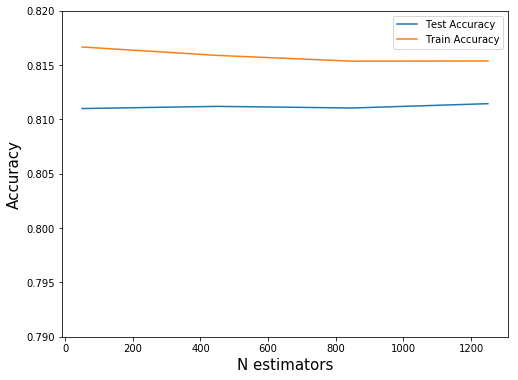

In [29]:
#plotting the results

plt.figure(figsize = (8,6))

plt.plot(scores['param_n_estimators'], scores['mean_test_score'], label = 'Test Accuracy')
plt.plot(scores['param_n_estimators'], scores['mean_train_score'], label = 'Train Accuracy')
plt.xlabel('N estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.ylim([0.79,0.82])
plt.legend()
plt.show()

In [30]:
#now we will tune the max_features

folds = KFold(n_splits= 5, shuffle= True)

parameters = {'max_features': [4,8,10,14,18,22,24]}

rf = RandomForestClassifier(max_depth= 4)

rf = GridSearchCV(rf, cv= folds, param_grid= parameters, scoring= 'accuracy')

rf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 10, 14, 18, 22, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [31]:
#convert to a df

scores = rf.cv_results_
scores = pd.DataFrame(scores)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.133518,0.013563,0.005397,0.000489,4,{'max_features': 4},0.808706,0.805224,0.818159,0.826617,...,0.810796,0.010778,7,0.808955,0.810510,0.820398,0.817848,0.812935,0.814129,0.004346
1,0.223264,0.006525,0.004996,0.000001,8,{'max_features': 8},0.816915,0.815174,0.815672,0.827612,...,0.817512,0.005283,5,0.818284,0.821206,0.821455,0.816978,0.822637,0.820112,0.002123
2,0.268235,0.004406,0.005597,0.000489,10,{'max_features': 10},0.819652,0.815423,0.816169,0.829851,...,0.817811,0.007124,4,0.818905,0.821766,0.820709,0.818221,0.822264,0.820373,0.001576
3,0.364975,0.007929,0.005398,0.000490,14,{'max_features': 14},0.821642,0.817164,0.817662,0.828856,...,0.818806,0.006558,2,0.819652,0.822264,0.821331,0.818532,0.822512,0.820858,0.001536
4,0.450323,0.005273,0.004997,0.000001,18,{'max_features': 18},0.819900,0.814677,0.813682,0.829104,...,0.817313,0.006806,6,0.820771,0.822264,0.821704,0.818968,0.822823,0.821306,0.001351


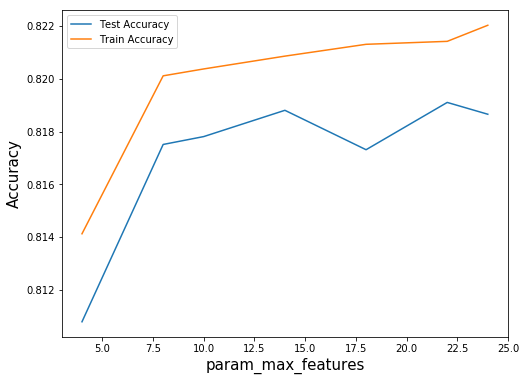

In [32]:
#plotting the results
plt.figure(figsize = (8,6))

plt.plot(scores['param_max_features'], scores['mean_test_score'], label = 'Test Accuracy')
plt.plot(scores['param_max_features'], scores['mean_train_score'], label = 'Train Accuracy')
plt.xlabel('param_max_features', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.show()

**As we can see that model is having almost the same accuracy on features > 10**

In [36]:
#now we wil tune the min_samples_leaf

folds = KFold(n_splits= 5, shuffle= True)

parameters = {'min_samples_leaf': range(50,300,50)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,cv= folds, param_grid= parameters, scoring= 'accuracy')

rf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(50, 300, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
scores = rf.cv_results_
scores = pd.DataFrame(scores)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.282026,0.003427,0.008395,8.004668e-04,50,{'min_samples_leaf': 50},0.807711,0.812935,0.805224,0.815672,...,0.813284,0.006873,2,0.821517,0.821891,0.822512,0.820896,0.818843,0.821132,0.001259
1,0.233655,0.003813,0.007595,7.996084e-04,100,{'min_samples_leaf': 100},0.810697,0.816169,0.801990,0.818657,...,0.814577,0.007864,1,0.818470,0.819154,0.818843,0.817662,0.816294,0.818085,0.001025
2,0.215467,0.003875,0.006996,6.975526e-07,150,{'min_samples_leaf': 150},0.792786,0.810199,0.807463,0.802736,...,0.805771,0.007724,4,0.805037,0.808147,0.820460,0.807214,0.809080,0.809988,0.005405
3,0.197678,0.006396,0.006796,4.000664e-04,200,{'min_samples_leaf': 200},0.802985,0.810945,0.798756,0.805224,...,0.806915,0.006264,3,0.807587,0.807774,0.808831,0.808644,0.808706,0.808308,0.000520
4,0.195479,0.008518,0.006796,3.999475e-04,250,{'min_samples_leaf': 250},0.796269,0.810697,0.798756,0.805721,...,0.804677,0.006258,5,0.803358,0.806219,0.807649,0.807463,0.802488,0.805435,0.002127


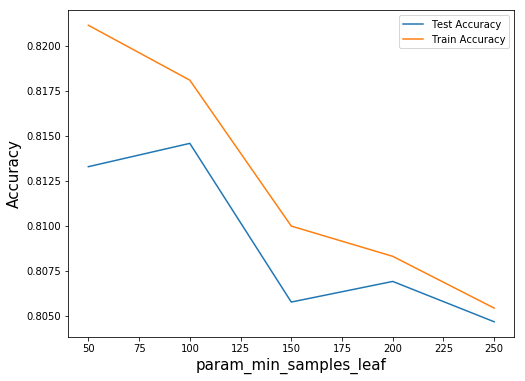

In [38]:
#plotting the results
plt.figure(figsize = (8,6))

plt.plot(scores['param_min_samples_leaf'], scores['mean_test_score'], label = 'Test Accuracy')
plt.plot(scores['param_min_samples_leaf'], scores['mean_train_score'], label = 'Train Accuracy')
plt.xlabel('param_min_samples_leaf', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.show()

**We can see that at lower value of sample leaf the model is overfitting**

In [39]:
#tuning min_samples_split

folds = KFold(n_splits=5, shuffle= True)

parameters = {'min_samples_split': range(200, 500, 50)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,cv= folds, param_grid= parameters, scoring= 'accuracy')

rf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
scores = rf.cv_results_
scores = pd.DataFrame(scores)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.322403,0.012331,0.007995,6.289914e-07,200,{'min_samples_split': 200},0.817910,0.818159,0.818657,0.811692,...,0.817214,0.002825,1,0.822699,0.824067,0.822637,0.825373,0.823134,0.823582,0.001031
1,0.302015,0.007273,0.007995,2.431402e-07,250,{'min_samples_split': 250},0.820647,0.817910,0.814925,0.807711,...,0.816219,0.004692,2,0.820522,0.822575,0.819900,0.821455,0.821393,0.821169,0.000909
2,0.289023,0.007829,0.007596,7.994656e-04,300,{'min_samples_split': 300},0.819900,0.812189,0.818159,0.805224,...,0.814776,0.005456,6,0.820522,0.818532,0.818968,0.819590,0.820274,0.819577,0.000754
3,0.284625,0.003866,0.007795,7.477930e-04,350,{'min_samples_split': 350},0.821144,0.814428,0.820149,0.807711,...,0.816070,0.004810,3,0.819341,0.820647,0.817973,0.817164,0.818532,0.818731,0.001193
4,0.281227,0.008886,0.007396,4.894938e-04,400,{'min_samples_split': 400},0.819154,0.816169,0.816169,0.810945,...,0.815920,0.002716,5,0.819030,0.819714,0.816604,0.820274,0.819900,0.819104,0.001314


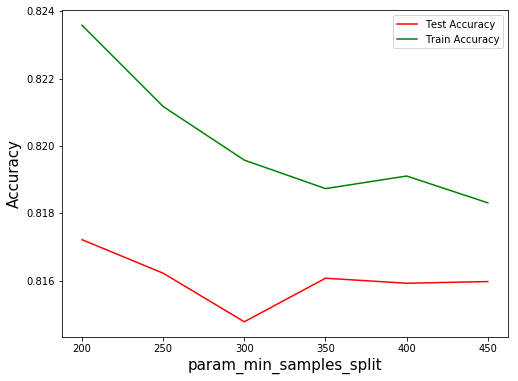

In [43]:
plt.figure(figsize = (8,6))

plt.plot(scores['param_min_samples_split'], scores['mean_test_score'], color = 'red', label = 'Test Accuracy')
plt.plot(scores['param_min_samples_split'], scores['mean_train_score'], color = 'green', label= 'Train Accuracy')
plt.xlabel('param_min_samples_split', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend(loc = 'upper right')
plt.show()

**As we increase the value for param_min_samples_split  the overfitting is reduced.**

## Grid Search to find optimal parameters

In [44]:
folds = KFold(n_splits=3, shuffle= True)

params = {'max_depth': [3,5,7],
'n_estimators': [800,1000,1200],
'max_features': [15,20,24],
'min_samples_leaf': [200,250,300],
'min_samples_split': [350,400,450]}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator= rf, cv= folds, param_grid= params, scoring= 'accuracy', verbose= True, n_jobs= -1)
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 127.2min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 254.5min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'n_estimators': [800, 1000, 1200], 'max_features': [15, 20, 24], 'min_samples_leaf': [200, 250, 300], 'min_samples_split': [350, 400, 450]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

In [45]:
#now we will get the best score and best paramaters
print('the best score of {} is achieved at {}'.format(grid_search.best_score_,grid_search.best_params_))

the best score of 0.8167661691542288 is achieved at {'max_depth': 5, 'max_features': 24, 'min_samples_leaf': 200, 'min_samples_split': 350, 'n_estimators': 800}


### Now lets get the predictions at best parameters.

In [47]:
rfc_fin = RandomForestClassifier(max_depth= 5, max_features= 24, min_samples_leaf= 200, 
                                 min_samples_split= 350, n_estimators= 800)
    
    
rfc_fin.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=24, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=200, min_samples_split=350,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
pred_final = rfc_fin.predict(X_test)

In [49]:
#judging the accuracy
from sklearn import metrics

In [50]:
metrics.confusion_matrix(y_test,pred_final)

array([[7403,  356],
       [1348,  793]], dtype=int64)

In [52]:
c_rep = metrics.classification_report(y_test,pred_final)
print(c_rep)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7759
           1       0.69      0.37      0.48      2141

   micro avg       0.83      0.83      0.83      9900
   macro avg       0.77      0.66      0.69      9900
weighted avg       0.81      0.83      0.81      9900



In [53]:
metrics.accuracy_score(y_test,pred_final)

0.8278787878787879